In [1]:
import pandas as pd
import random

%matplotlib inline

/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


With model testing: Try TDD
* Test: check if attribute there in the beginning.
* Define test and then run. 
* So create a fake data frame to run test on. 
    - Have list of models in df, 
    - attribute values, 
    - some disparities, and try it out. 
* Get CSV and make CSV for the tes (attributes, and disparities) Load to CSV and run.

In [2]:
attributes = {'race': ['Black', 'White', 'Hispanic', 'Asian', 'Other'], 'eye_col': ['blue', 'green', 'brown', 'grey']}

In [3]:
random.seed(1237812)

test_df = pd.DataFrame({'model_id': [random.randint(0, 8) for _ in range(175)],
              'label_value':[random.randint(0, 1) for _ in range(175)], 
              'score': [random.uniform(0, 1) for _ in range(175)], 
              'race': [attributes['race'][random.randint(0, len(attributes['race'])-1)] for _ in range(175)],
              'eye_col':[attributes['eye_col'][random.randint(0, len(attributes['eye_col'])-1)] for _ in range(175)]
             }, columns=['model_id', 'label_value', 'score', 'race', 'eye_col'])

In [4]:
test_df.sort_values('model_id').style

,model_id,label_value,score,race,eye_col
41,0,1,0.570157,Other,grey
48,0,1,0.28232,Asian,green
81,0,1,0.680783,Other,brown
107,0,1,0.480497,Black,blue
99,0,1,0.85954,Hispanic,grey
98,0,1,0.701157,Asian,green
46,0,1,0.467162,Black,brown
158,0,0,0.187423,Asian,green
6,0,0,0.770668,Hispanic,grey
92,0,1,0.630121,Hispanic,green


In [5]:
# Confirm enough per model won't throw errors/ get skipped in statistical significance tests
test_df.groupby('model_id')['score'].count()

model_id
0    14
1    25
2    21
3    14
4    19
5    20
6    20
7    19
8    23
Name: score, dtype: int64

In [6]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

In [7]:
g = Group()

xtabs = []

for model in test_df.model_id.unique():
    xtab, _ = g.get_crosstabs(test_df.loc[test_df['model_id']==model], score_thresholds={'rank_abs':[75]}, model_id=model)
    xtabs.append(xtab)
all_xtab = pd.concat(xtabs, ignore_index=True)

model_id, score_thresholds 4 {'rank_abs': [75]}
COUNTS::: race
Asian       2
Black       6
Hispanic    5
Other       2
White       4
dtype: int64
COUNTS::: eye_col
blue     6
brown    4
green    6
grey     3
dtype: int64
model_id, score_thresholds 2 {'rank_abs': [75]}
COUNTS::: race
Asian       7
Black       4
Hispanic    3
Other       4
White       3
dtype: int64
COUNTS::: eye_col
blue     7
brown    6
green    1
grey     7
dtype: int64
model_id, score_thresholds 1 {'rank_abs': [75]}
COUNTS::: race
Asian       9
Black       5
Hispanic    2
Other       3
White       6
dtype: int64
COUNTS::: eye_col
blue     10
brown     6
green     4
grey      5
dtype: int64
model_id, score_thresholds 8 {'rank_abs': [75]}
COUNTS::: race
Asian       4
Black       4
Hispanic    8
Other       2
White       5
dtype: int64
COUNTS::: eye_col
blue     8
brown    5
green    4
grey     6
dtype: int64
model_id, score_thresholds 0 {'rank_abs': [75]}
COUNTS::: race
Asian       3
Black       3
Hispanic    4
Other  

In [8]:
all_xtab

,attribute_name,attribute_value,k,model_id,score_threshold,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_neg,group_label_pos,group_size,total_entities,prev
0,race,Asian,19,4,75_abs,NaN,0.0,NaN,1.000000,1.0,...,1.0,2,0,0,0,2,0,2,19,0.000000
1,race,Black,19,4,75_abs,1.0,0.0,NaN,0.833333,1.0,...,1.0,5,0,0,1,5,1,6,19,0.166667
2,race,Hispanic,19,4,75_abs,1.0,0.0,NaN,0.600000,1.0,...,1.0,3,0,0,2,3,2,5,19,0.400000
3,race,Other,19,4,75_abs,1.0,NaN,NaN,0.000000,NaN,...,1.0,0,0,0,2,0,2,2,19,1.000000
4,race,White,19,4,75_abs,1.0,0.0,NaN,0.500000,1.0,...,1.0,2,0,0,2,2,2,4,19,0.500000
5,eye_col,blue,19,4,75_abs,1.0,0.0,NaN,0.333333,1.0,...,1.0,2,0,0,4,2,4,6,19,0.666667
6,eye_col,brown,19,4,75_abs,1.0,0.0,NaN,0.750000,1.0,...,1.0,3,0,0,1,3,1,4,19,0.250000
7,eye_col,green,19,4,75_abs,1.0,0.0,NaN,0.666667,1.0,...,1.0,4,0,0,2,4,2,6,19,0.333333
8,eye_col,grey,19,4,75_abs,NaN,0.0,NaN,1.000000,1.0,...,1.0,3,0,0,0,3,0,3,19,0.000000
9,race,Asian,21,2,75_abs,1.0,0.0,NaN,0.285714,1.0,...,1.0,2,0,0,5,2,5,7,21,0.714286


In [9]:
b = Bias()
bdfs = []
for model in test_df.model_id.unique():
    bdf = b.get_disparity_predefined_groups(all_xtab.loc[all_xtab['model_id']==model], 
                                            original_df=test_df.loc[test_df['model_id']==model], 
                                            ref_groups_dict={'race':'White', 'eye_col':'green'}, 
                                            alpha=0.05, mask_significance=True)
    bdfs.append(bdf)
all_bdf = pd.concat(bdfs, ignore_index=True)

get_disparity_predefined_group()
get_disparity_predefined_group()


/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/site-packages/scipy/stats/morestats.py:1969: RuntimeWarning: divide by zero encountered in double_scalars
  W = numer / denom
/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/site-packages/scipy/stats/morestats.py:1969: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/site-packages/numpy/core/_methods.py

get_disparity_predefined_group()
get_disparity_predefined_group()


/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


get_disparity_predefined_group()
get_disparity_predefined_group()
get_disparity_predefined_group()
get_disparity_predefined_group()
get_disparity_predefined_group()


In [10]:
all_bdf.style

,attribute_name,attribute_value,k,model_id,score_threshold,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_neg,group_label_pos,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value,fn_significance,fp_significance,score_significance,label_value_significance
0,race,Asian,19,4,75_abs,nan,0,nan,1,1,nan,nan,0,2,0,0.105263,1,2,0,0,0,2,0,2,19,0,0.5,1,0,2,nan,1,nan,nan,nan,nan,White,White,White,White,White,White,White,White,White,White,False,None,None,False
1,race,Black,19,4,75_abs,1,0,nan,0.833333,1,0,nan,0.166667,6,0,0.315789,1,5,0,0,1,5,1,6,19,0.166667,1.5,1,0.333333,1.66667,nan,1,nan,1,nan,nan,White,White,White,White,White,White,White,White,White,White,False,None,None,False
2,race,Hispanic,19,4,75_abs,1,0,nan,0.6,1,0,nan,0.4,5,0,0.263158,1,3,0,0,2,3,2,5,19,0.4,1.25,1,0.8,1.2,nan,1,nan,1,nan,nan,White,White,White,White,White,White,White,White,White,White,False,None,None,False
3,race,Other,19,4,75_abs,1,nan,nan,0,nan,0,nan,1,2,0,0.105263,1,0,0,0,2,0,2,2,19,1,0.5,1,2,0,nan,nan,nan,1,nan,nan,White,White,White,White,White,White,White,White,White,White,False,None,None,False
4,race,White,19,4,75_abs,1,0,nan,0.5,1,0,nan,0.5,4,0,0.210526,1,2,0,0,2,2,2,4,19,0.5,1,1,1,1,nan,1,nan,1,nan,nan,White,White,White,White,White,White,White,White,White,White,False,None,None,False
5,eye_col,blue,19,4,75_abs,1,0,nan,0.333333,1,0,nan,0.666667,6,0,0.315789,1,2,0,0,4,2,4,6,19,0.666667,1,1,2,0.5,nan,1,nan,1,nan,nan,green,green,green,green,green,green,green,green,green,green,False,None,None,False
6,eye_col,brown,19,4,75_abs,1,0,nan,0.75,1,0,nan,0.25,4,0,0.210526,1,3,0,0,1,3,1,4,19,0.25,0.666667,1,0.75,1.125,nan,1,nan,1,nan,nan,green,green,green,green,green,green,green,green,green,green,False,None,None,False
7,eye_col,green,19,4,75_abs,1,0,nan,0.666667,1,0,nan,0.333333,6,0,0.315789,1,4,0,0,2,4,2,6,19,0.333333,1,1,1,1,nan,1,nan,1,nan,nan,green,green,green,green,green,green,green,green,green,green,False,None,None,False
8,eye_col,grey,19,4,75_abs,nan,0,nan,1,1,nan,nan,0,3,0,0.157895,1,3,0,0,0,3,0,3,19,0,0.5,1,0,1.5,nan,1,nan,nan,nan,nan,green,green,green,green,green,green,green,green,green,green,False,None,None,False
9,race,Asian,21,2,75_abs,1,0,nan,0.285714,1,0,nan,0.714286,7,0,0.333333,1,2,0,0,5,2,5,7,21,0.714286,2.33333,1,1.07143,0.857143,nan,1,nan,1,nan,nan,White,White,White,White,White,White,White,White,White,White,False,None,None,False


In [11]:
p = Plot()

All Model 1 values for metric 'for' are NA, 'for' not visualized.
All Model 1 values for metric 'fnr' are NA, 'fnr' not visualized.
All Model 3 values for metric 'for' are NA, 'for' not visualized.
All Model 3 values for metric 'fnr' are NA, 'fnr' not visualized.


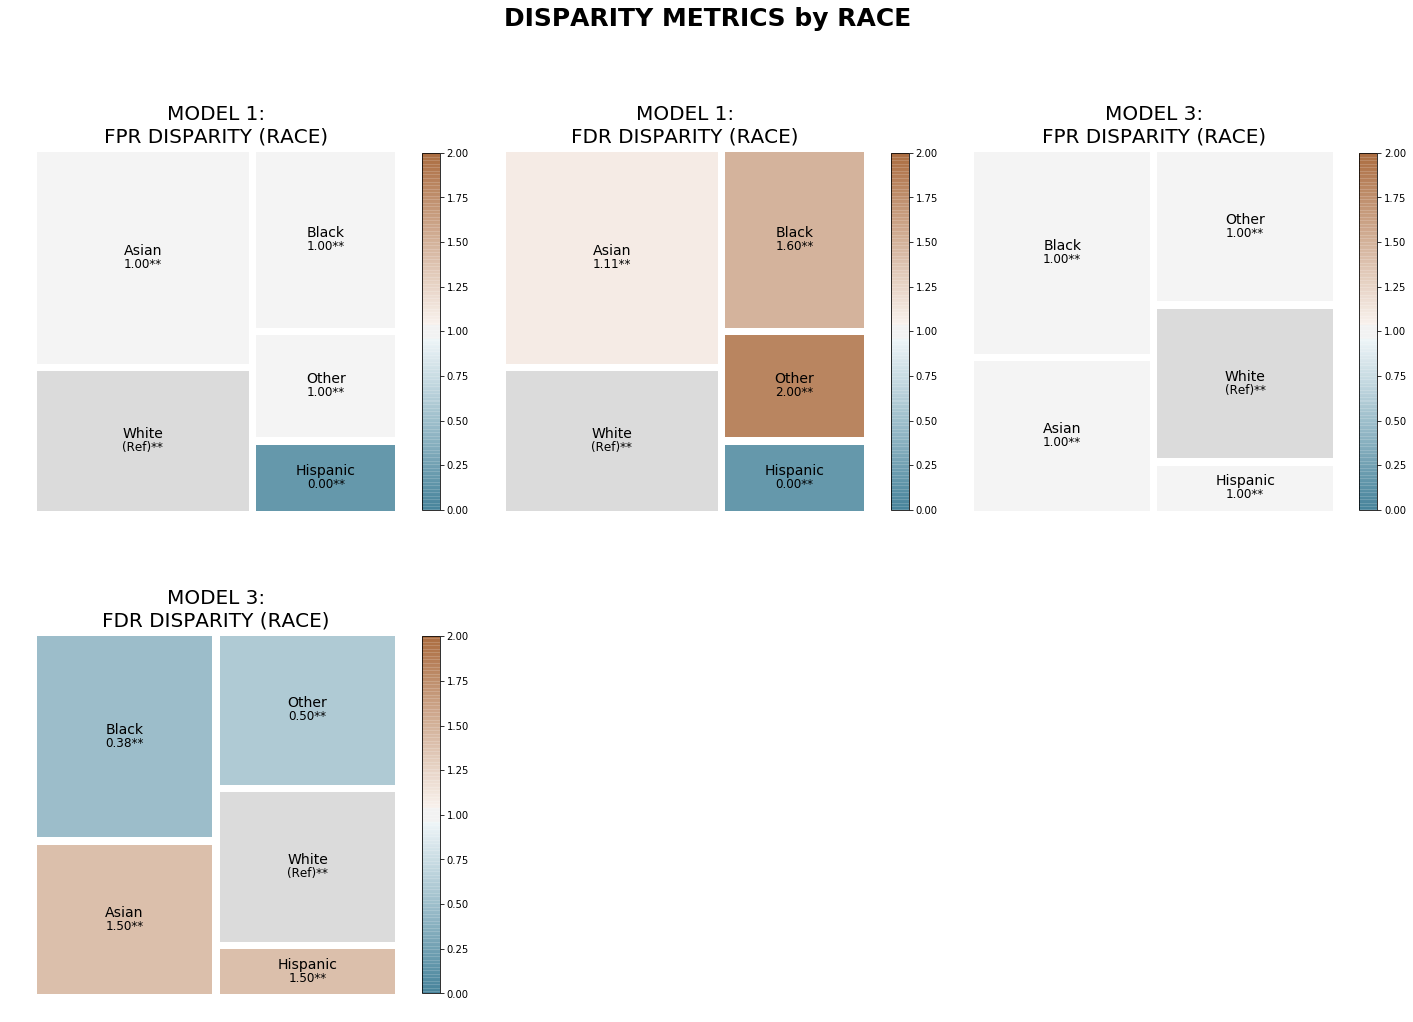

In [12]:
l =p.plot_disparity_all(data_table=all_bdf, attributes=["race"], metrics=["fpr", "fdr", 'for', "fnr"], models=[1, 3])

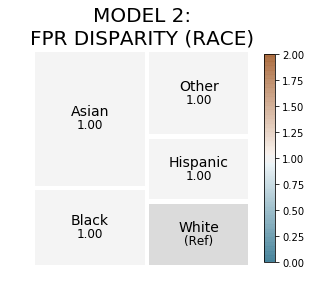

In [13]:
p.plot_disparity(all_bdf, attribute_name="race", group_metric="fpr", model_id=2)

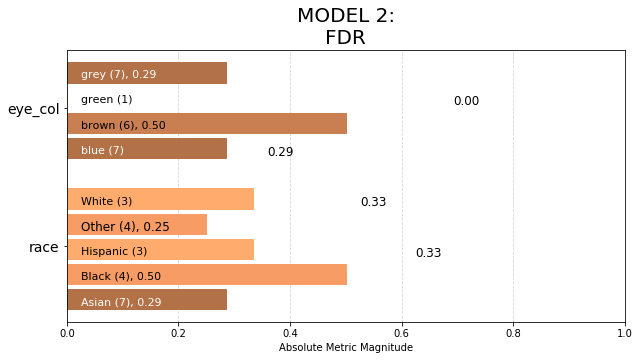

In [14]:
p.plot_group_metric(all_bdf, group_metric="fdr", model_id=2)

All Model 1 values for metric 'for' are NA, 'for' not visualized.
All Model 1 values for metric 'fnr' are NA, 'fnr' not visualized.
All Model 3 values for metric 'for' are NA, 'for' not visualized.
All Model 3 values for metric 'fnr' are NA, 'fnr' not visualized.


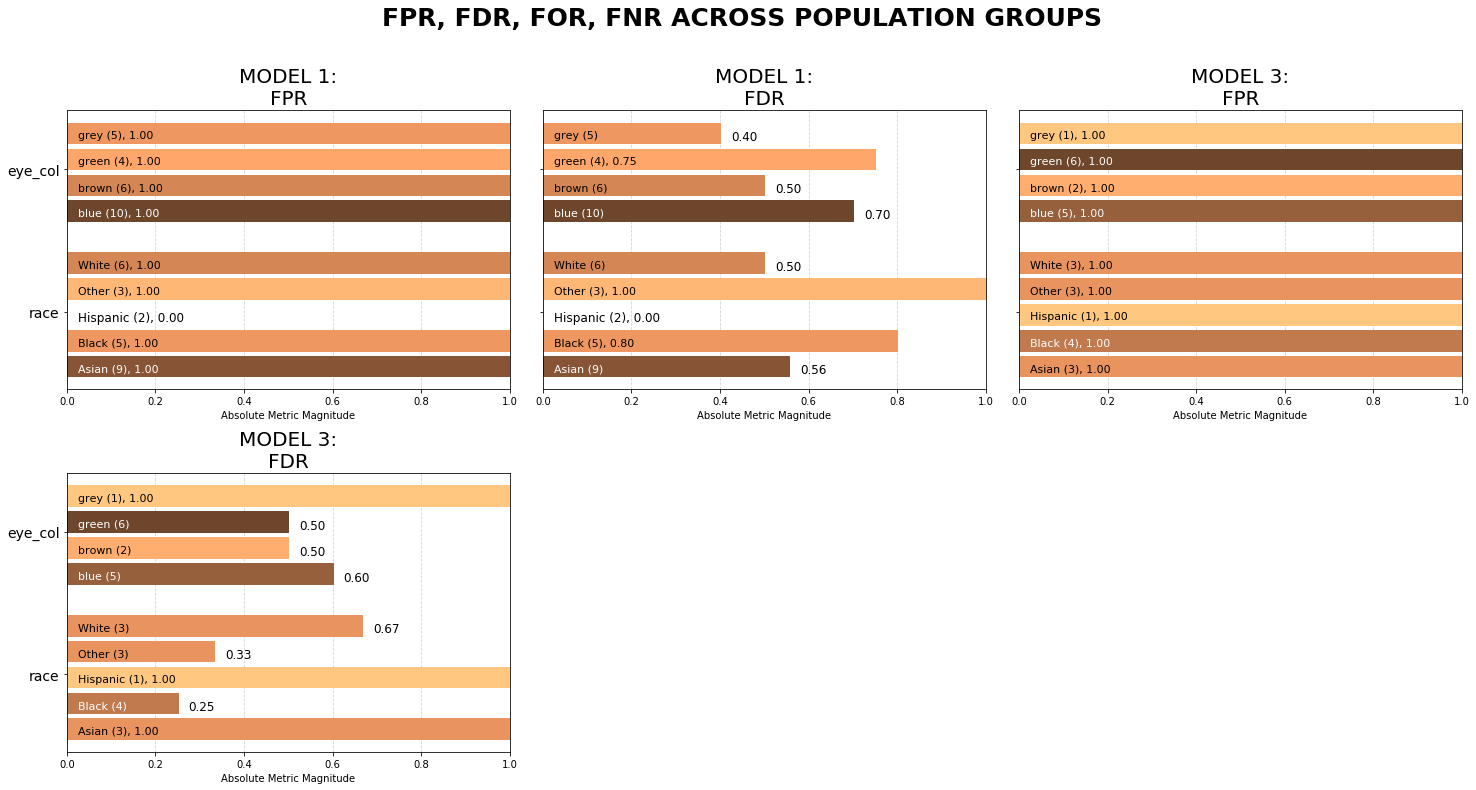

In [15]:
d = p.plot_group_metric_all(all_bdf, metrics=["fpr", "fdr", 'for', "fnr"], models=[1, 3])

In [16]:
f = Fairness()
fdfs = []
for model in test_df.model_id.unique():
    fdf = f.get_group_value_fairness(all_bdf.loc[all_bdf['model_id']==model])
    fdfs.append(fdf)
all_fdf = pd.concat(fdfs, ignore_index=True)

/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [17]:
all_fdf.head()

,attribute_name,attribute_value,k,model_id,score_threshold,tpr,tnr,for,fdr,fpr,...,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,race,Asian,19,4,75_abs,NaN,0.0,NaN,1.000000,1.0,...,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False
1,race,Black,19,4,75_abs,1.0,0.0,NaN,0.833333,1.0,...,NaN,True,NaN,NaN,False,False,NaN,True,False,False
2,race,Hispanic,19,4,75_abs,1.0,0.0,NaN,0.600000,1.0,...,NaN,True,NaN,NaN,True,True,NaN,True,True,False
3,race,Other,19,4,75_abs,1.0,NaN,NaN,0.000000,NaN,...,NaN,True,NaN,NaN,False,False,NaN,False,False,False
4,race,White,19,4,75_abs,1.0,0.0,NaN,0.500000,1.0,...,NaN,True,NaN,NaN,True,True,NaN,True,True,False


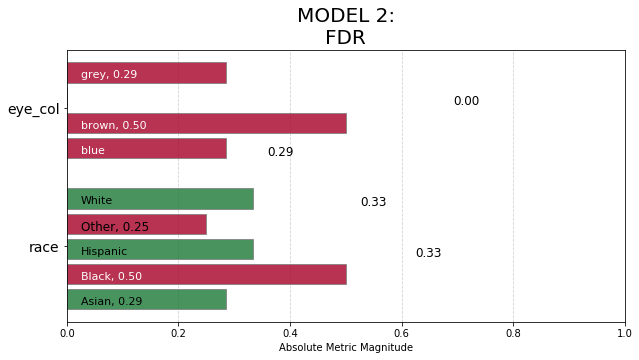

In [18]:
p.plot_fairness_group(all_fdf, group_metric="fdr", model_id=2)

All Model 2 values for metric 'for' are NA, 'for' not visualized.
All Model 3 values for metric 'for' are NA, 'for' not visualized.
All Model 8 values for metric 'for' are NA, 'for' not visualized.


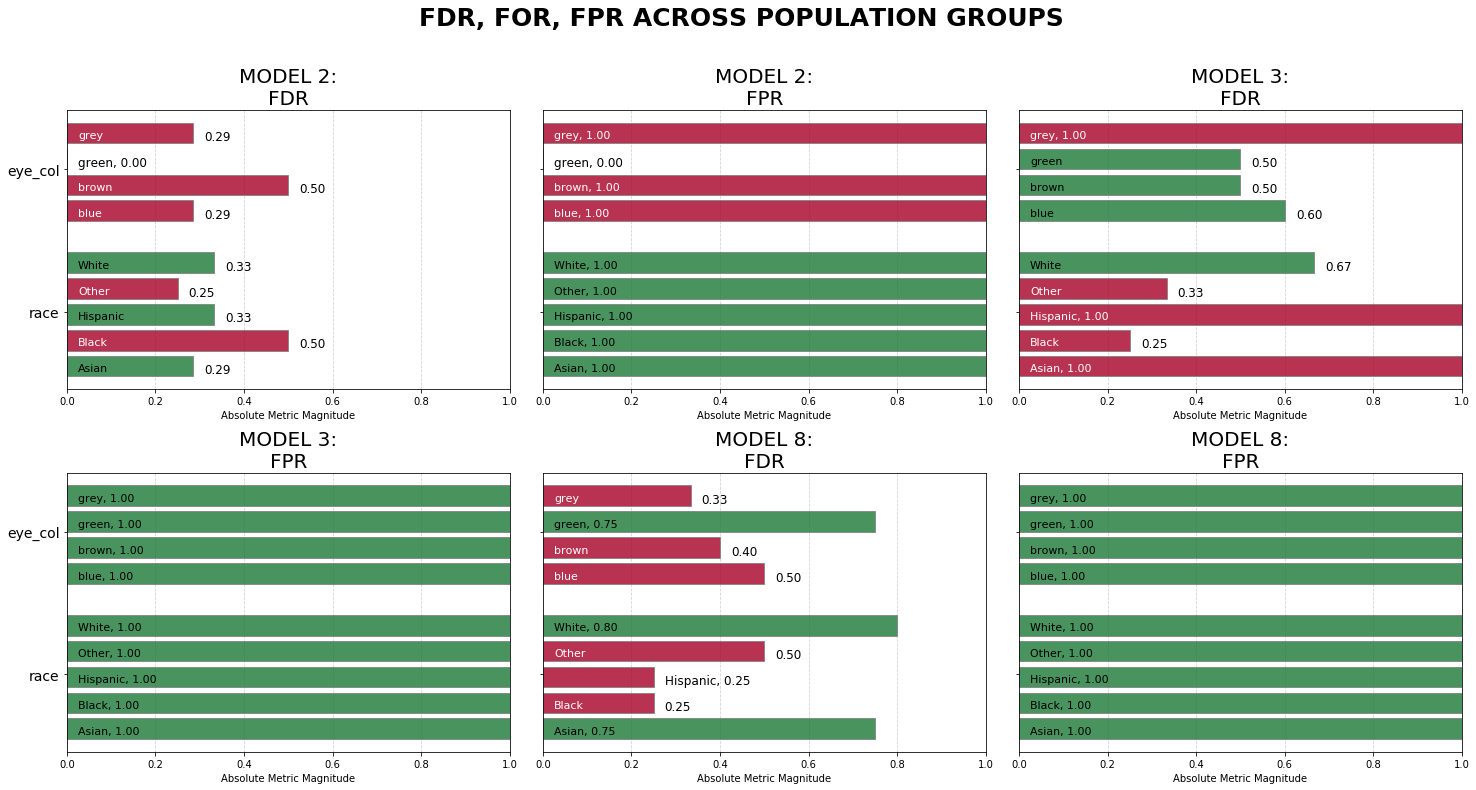

In [19]:
m = p.plot_fairness_group_all(all_fdf, metrics=["fdr", "for", "fpr"], models=[2, 3, 8])

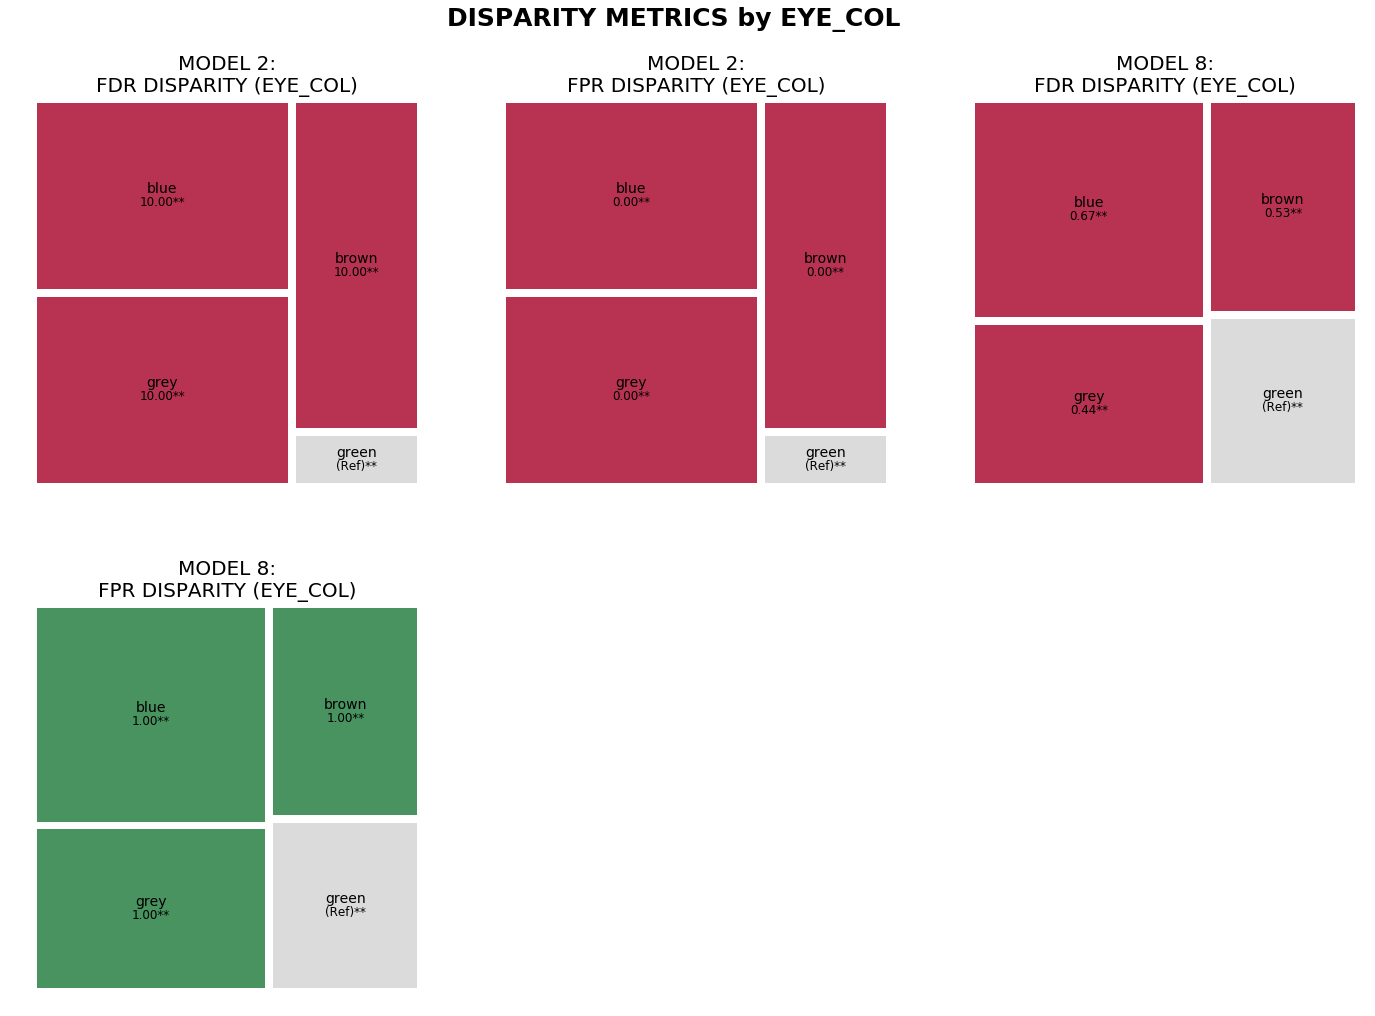

In [20]:
m = p.plot_fairness_disparity_all(all_fdf, metrics=["fdr", "fpr"], attributes=["eye_col"], models=[2, 8])